- SVM

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
from sklearn.datasets import make_classification

In [18]:
x,y = make_classification(n_samples=1000 , n_features=2, n_classes=2 ,n_clusters_per_class=2, n_redundant=0,random_state=42)

In [19]:
x

array([[-0.99910178, -0.66386   ],
       [ 1.24668618,  1.15359685],
       [ 0.96277683,  0.85939747],
       ...,
       [-0.10126746, -1.59017563],
       [ 0.64376105, -0.78053855],
       [ 0.69852984, -1.27940455]])

In [20]:
pd.DataFrame(x)
pd.DataFrame(y)

,0
0,1
1,1
2,1
3,1
4,1
...,...
995,0
996,1
997,0
998,0


<Axes: xlabel='0', ylabel='1'>

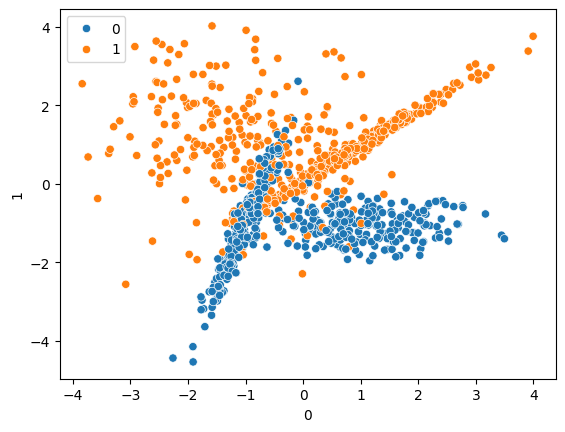

In [21]:
sns.scatterplot(x= pd.DataFrame(x)[0],y= pd.DataFrame(x)[1],hue=y)

In [28]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y , test_size=0.30 ,random_state=42)

In [29]:
from sklearn.svm import SVC

In [30]:
svc = SVC(kernel='linear')# As data points are clearly Sprable

In [31]:
svc.fit(x_train,y_train)

SVC(kernel='linear')

In [32]:
y_pred = svc.predict(x_test)

In [33]:
from sklearn.metrics import confusion_matrix,classification_report

In [34]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       148
           1       0.90      0.86      0.88       152

    accuracy                           0.88       300
   macro avg       0.88      0.88      0.88       300
weighted avg       0.88      0.88      0.88       300

[[133  15]
 [ 22 130]]


In [37]:
rbf = SVC(kernel='rbf')

In [38]:

rbf.fit(x_train,y_train)

SVC()

In [41]:
y_pred1 = rbf.predict(x_test)

In [ ]:
# Accuracy has Improved 
print(classification_report(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89       148
           1       0.93      0.84      0.88       152

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300

[[139   9]
 [ 25 127]]


In [ ]:
# We can check for polynomial and other KERNELS as WEll

# and the one with highest Accuracy will be the Best 

In [43]:
sigmoid = SVC(kernel='sigmoid')

sigmoid.fit(x_train,y_train)
y_pred2 = sigmoid.predict(x_test)
# Accuracy has Improved 
print(classification_report(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
# We can check for polynomial and other KERNELS as WEll

              precision    recall  f1-score   support

           0       0.80      0.76      0.78       148
           1       0.78      0.82      0.79       152

    accuracy                           0.79       300
   macro avg       0.79      0.79      0.79       300
weighted avg       0.79      0.79      0.79       300

[[112  36]
 [ 28 124]]


Hyperparameter Tuning

In [45]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C':[0.1,1,10,100,1000],
              'gamma':[1,0.1,0.01,0.001,0.0001],
              'kernel':['rbf']
              }

In [47]:

grid = GridSearchCV(SVC(),param_grid=param_grid,refit= True,cv=5,verbose=3)

In [48]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.921 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.864 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.886 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.850 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.864 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.886 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.850 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.879 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.864 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.821 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.886 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [49]:
grid.best_params_

{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}

In [51]:
# With correct C value the Accuracy has Increased 
y_pred3= grid.predict(x_test)
# Accuracy has Improved 
print(classification_report(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
# We can check for polynomial and other KERNELS as WEll

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       148
           1       0.98      0.86      0.91       152

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300

[[145   3]
 [ 22 130]]


In [52]:
sigmoid.intercept_

array([-0.25834635])

In [ ]:
# making a 3 D daiagram 
%pip install plotly.express

import plotly.express  as px 

fig = px.scatter_3d(df, x='x1' ,y = 'x2', z='x1*x2' , color = 'y' )

fig.show()

^C
Note: you may need to restart the kernel to use updated packages.


NameError: name 'df' is not defined